In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
%matplotlib inline
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler,QuantileTransformer, PowerTransformer,RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score,f1_score
import statsmodels.api as sm

In [3]:
df_diab= pd.read_csv("PimaDiabetes.csv")

In [4]:
#Showing top 5 rows of data
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# No. of Rows and columns
df_diab.shape

(750, 9)

## Summary of Data

In [6]:
#Info about the entire dataset
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       750 non-null    int64  
 1   Glucose           750 non-null    int64  
 2   BloodPressure     750 non-null    int64  
 3   SkinThickness     750 non-null    int64  
 4   Insulin           750 non-null    int64  
 5   BMI               750 non-null    float64
 6   DiabetesPedigree  750 non-null    float64
 7   Age               750 non-null    int64  
 8   Outcome           750 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.9 KB


In [7]:
#Summary Statistics for each feature
df_diab.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,750.0,3.844000,3.370085,0.000,1.000,3.000,6.0000,17.00
Glucose,750.0,120.737333,32.019671,0.000,99.000,117.000,140.7500,199.00
BloodPressure,750.0,68.982667,19.508814,0.000,62.000,72.000,80.0000,122.00
SkinThickness,750.0,20.489333,15.918828,0.000,0.000,23.000,32.0000,99.00
Insulin,750.0,80.378667,115.019198,0.000,0.000,36.500,129.7500,846.00
BMI,750.0,31.959067,7.927399,0.000,27.300,32.000,36.5750,67.10
DiabetesPedigree,750.0,0.473544,0.332119,0.078,0.244,0.377,0.6285,2.42
Age,750.0,33.166667,11.708872,21.000,24.000,29.000,40.7500,81.00
Outcome,750.0,0.346667,0.476226,0.000,0.000,0.000,1.0000,1.00


Finding Unique values

In [8]:
df_diab.nunique()

Pregnancies          17
Glucose             135
BloodPressure        47
SkinThickness        51
Insulin             183
BMI                 248
DiabetesPedigree    512
Age                  52
Outcome               2
dtype: int64

Finding missing values

In [9]:
df_diab.isnull().sum()

Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

# EXPLORATORY DATA ANALYSIS [EDA]

## 1. Univariate Analysis 


Count plot for target variable : identify who eventually had diabetes and who did not

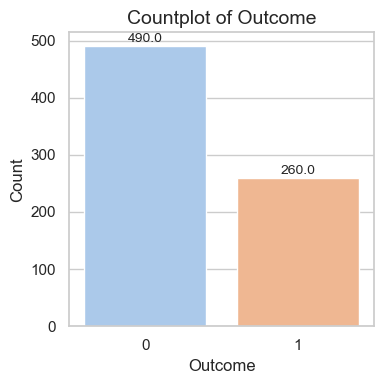

In [10]:
#Custom color pallet
color_palette = sns.color_palette("pastel")

#Setting the figure dimensions
sns.set(style="whitegrid")
plt.figure(figsize=(4,4))

ax = sns.countplot(data=df_diab, x='Outcome', palette=color_palette)
plt.title(f'Countplot of Outcome', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding count numbers on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

### Histogram of each feature

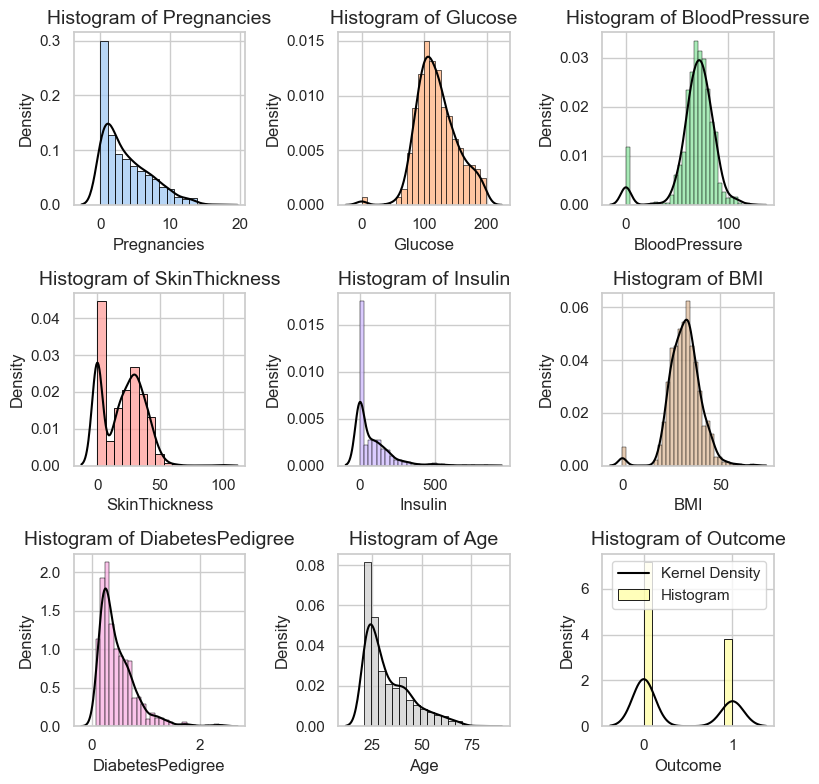

In [11]:
#Setting the figure dimensions
sns.set(style="whitegrid")
plt.figure(figsize=(8,8))

#Drawing histogram subplots for each feature
for i, column in enumerate(df_diab.columns):
    plt.subplot(3,3,i+1)
    sns.kdeplot(df_diab[column], color="black", label="Kernel Density")
    sns.histplot(df_diab[column], stat="density", color=color_palette[i], edgecolor="black",label="Histogram") # bins=20
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    #plt.ylabel('Frequency', fontsize=12)
    
plt.legend()
plt.tight_layout()
plt.show()
    

CountPlot for target variable : Outcome

Boxplot visualization for each feature

## 2.Bivariate Analysis

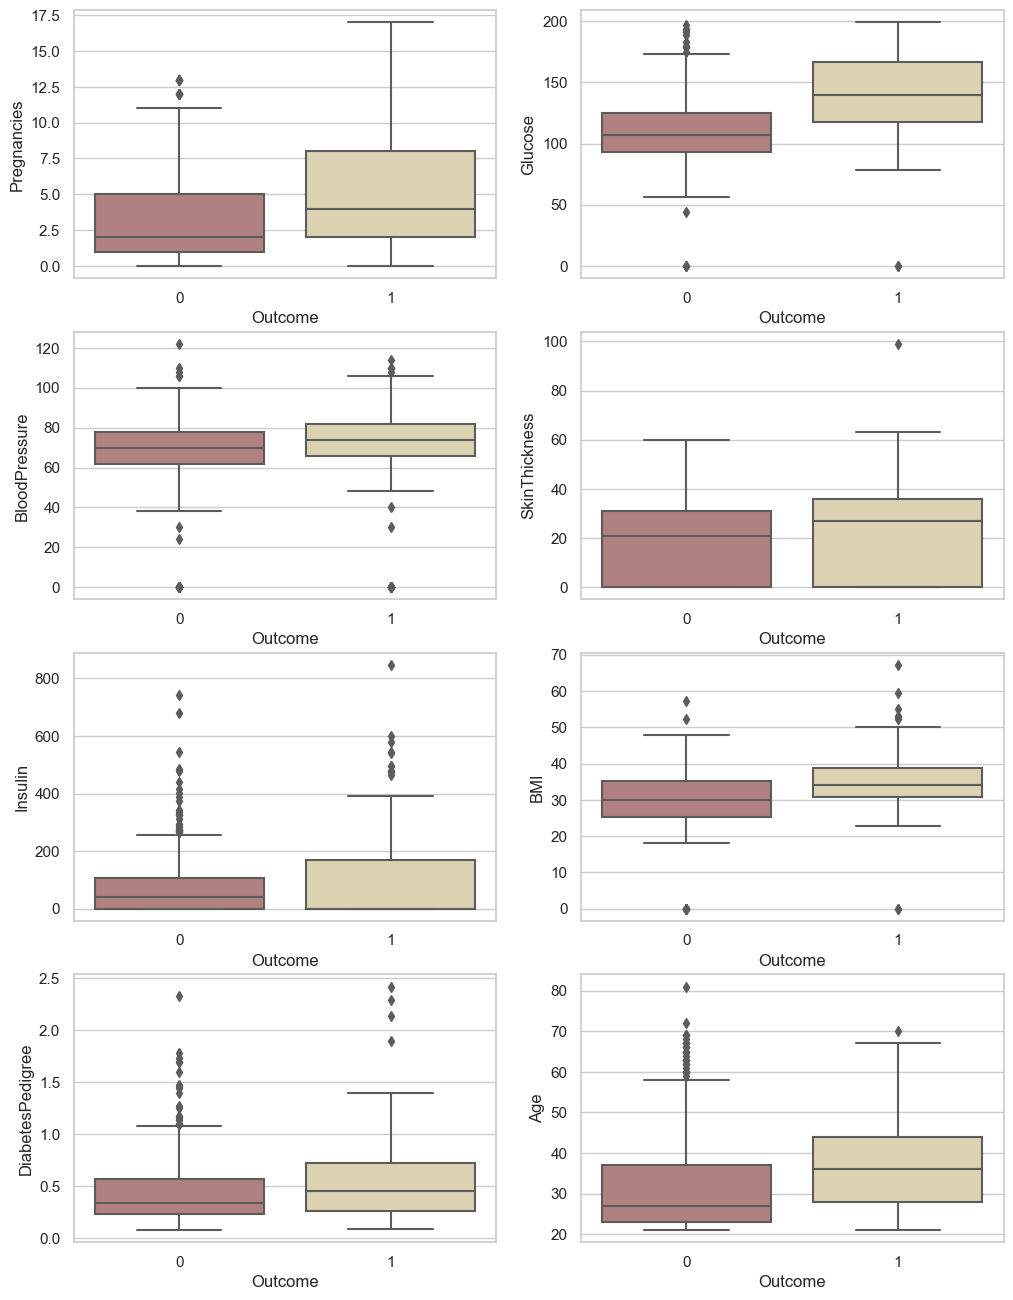

In [12]:
plt.figure(figsize=(12, 16))

for i, column in enumerate(df_diab.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x='Outcome',y=column,data=df_diab, palette='pink')
    #plt.title(f'Boxplot of {column}',fontsize=12)
    
plt.show()

### Violin plot 

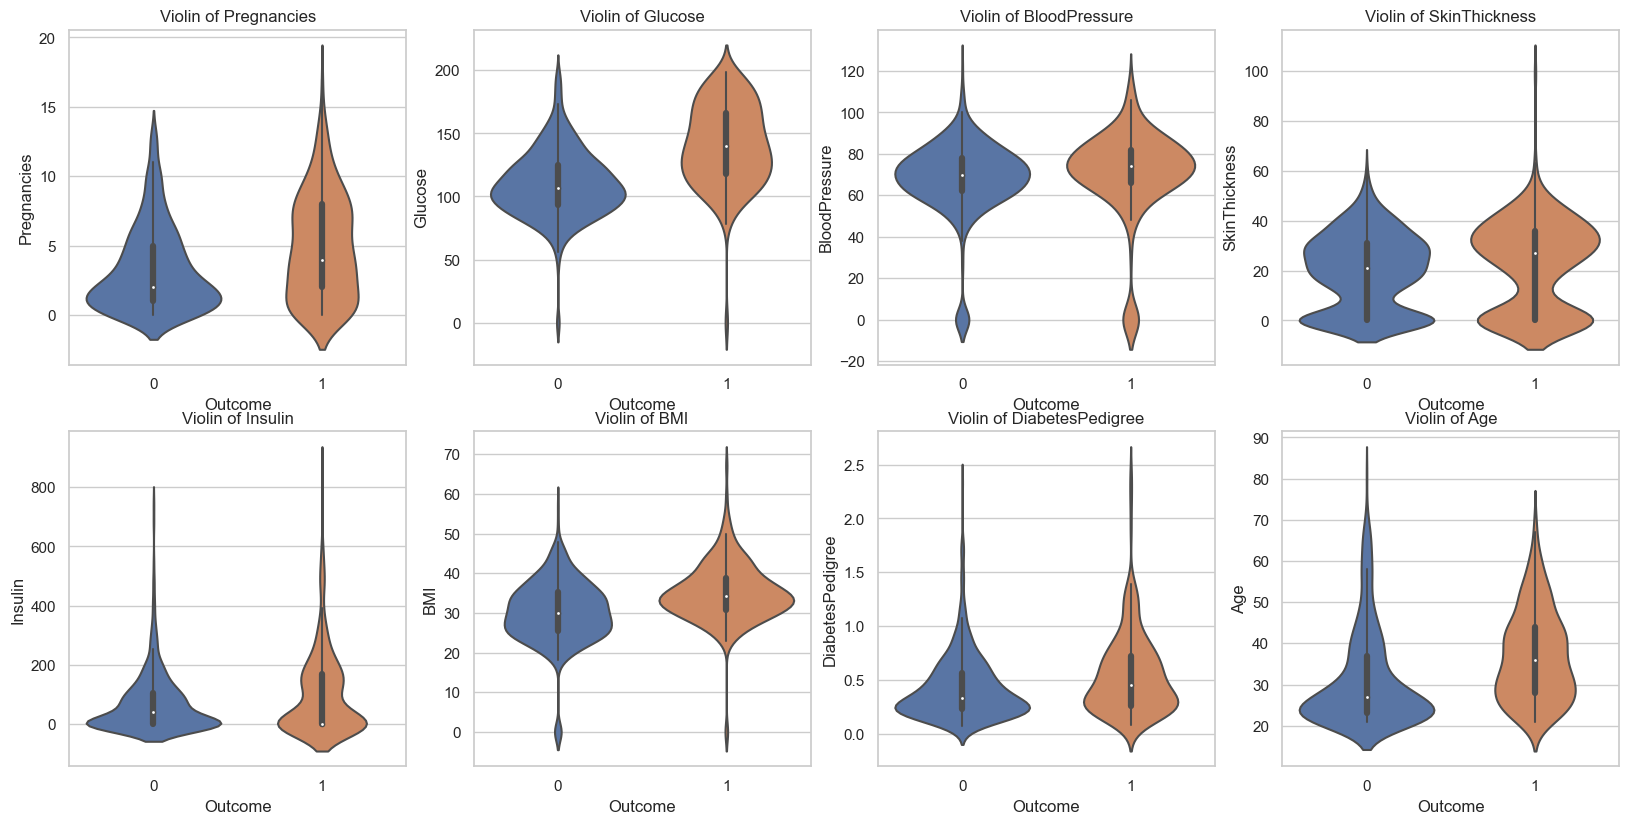

In [13]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df_diab.columns):
    if column == 'Outcome':
        continue
    plt.subplot(4, 4, i + 1)
    sns.violinplot(x='Outcome', y=column, data=df_diab)
    plt.title(f'Violin of {column}',fontsize=12)


#fig = plt.figure(figsize=(10,10))
#sns.countplot(data=df_diab, x='Pregnancies', hue='Outcome', palette='deep') #kind='reg', diag_kind= 'kde', corner=True
#plt.suptitle('Pair Plot for Pima Diabetes Dataset', y=1.02)
#plt.show()

#Setting the figure dimensions
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

#Flatten the axes for easy iteration
axes = axes.flatten()

#Iterate through each column
for i, column in enumerate(df_diab.columns):
    sns.countplot(data= df_diab,x=column, hue='Outcome', ax=axes[i])
    axes[i].set_title(f'Countplot of {column}', fontsize=14)
    axes[i].set_ylabel(f'Count', fontsize=12)

plt.tight_layout()
plt.show()

#### Pair Plot - 

Identifying patterns and correlations between different features, especially regarding diabetes outcomes.

### KDE Bivariate plotting

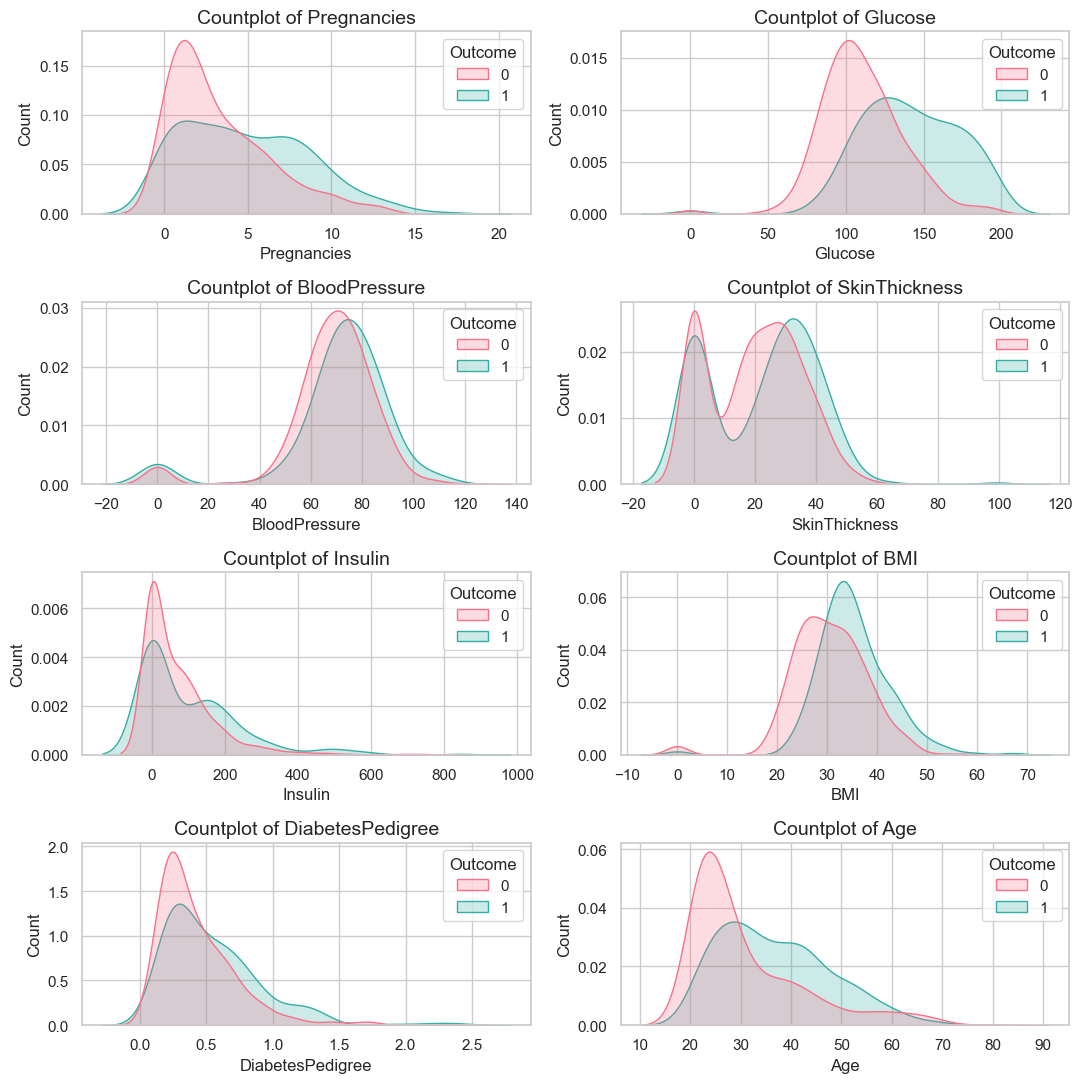

In [14]:
# Assuming df_diab is your DataFrame

# Setting the figure dimensions
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(11, 11))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over columns and create count plots
for i, column in enumerate(df_diab.columns[:-1]):  # Exclude 'Outcome' from count plots
    sns.kdeplot(x=column, hue='Outcome', data=df_diab, ax=axes[i], fill=True, common_norm=False, palette='husl')
    axes[i].set_title(f'Countplot of {column}', fontsize=14)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_xlabel(column, fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


#### Correlation Heat Map (Pearson's Correlation)
Correlation coefficient between two variables. The color intensity and direction indicate the strength and nature of the correlation.


In [15]:
df_diab.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.129594,0.142453,-0.087047,-0.070822,0.021739,-0.031085,0.547124,0.229235
Glucose,0.129594,1.000000,0.145972,0.056647,0.333005,0.214316,0.140364,0.259797,0.460310
BloodPressure,0.142453,0.145972,1.000000,0.205494,0.086750,0.278569,0.042922,0.237693,0.060860
SkinThickness,-0.087047,0.056647,0.205494,1.000000,0.436093,0.394615,0.189191,-0.115862,0.082205
Insulin,-0.070822,0.333005,0.086750,0.436093,1.000000,0.195726,0.191289,-0.040152,0.130928
BMI,0.021739,0.214316,0.278569,0.394615,0.195726,1.000000,0.143798,0.032972,0.289832
DiabetesPedigree,-0.031085,0.140364,0.042922,0.189191,0.191289,0.143798,1.000000,0.041807,0.170688
Age,0.547124,0.259797,0.237693,-0.115862,-0.040152,0.032972,0.041807,1.000000,0.232892
Outcome,0.229235,0.460310,0.060860,0.082205,0.130928,0.289832,0.170688,0.232892,1.000000


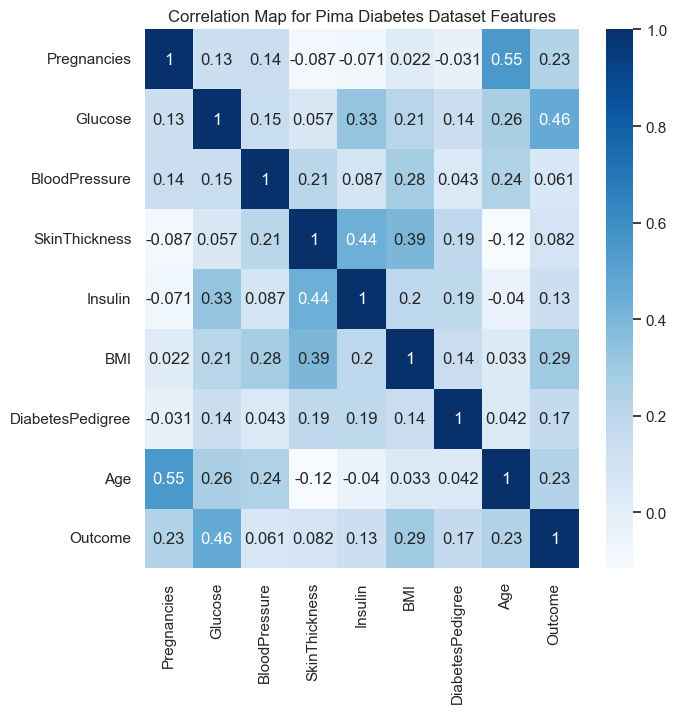

In [16]:
plt.figure(figsize=(7,7))
corr_matrix = df_diab.corr(method='pearson')
sns.heatmap(data=corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Map for Pima Diabetes Dataset Features')
plt.show()

## Multi-variate Analysis

In [17]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome             1.000000
Glucose             0.460310
BMI                 0.289832
Age                 0.232892
Pregnancies         0.229235
DiabetesPedigree    0.170688
Insulin             0.130928
SkinThickness       0.082205
BloodPressure       0.060860
Name: Outcome, dtype: float64

<Figure size 1000x1000 with 0 Axes>

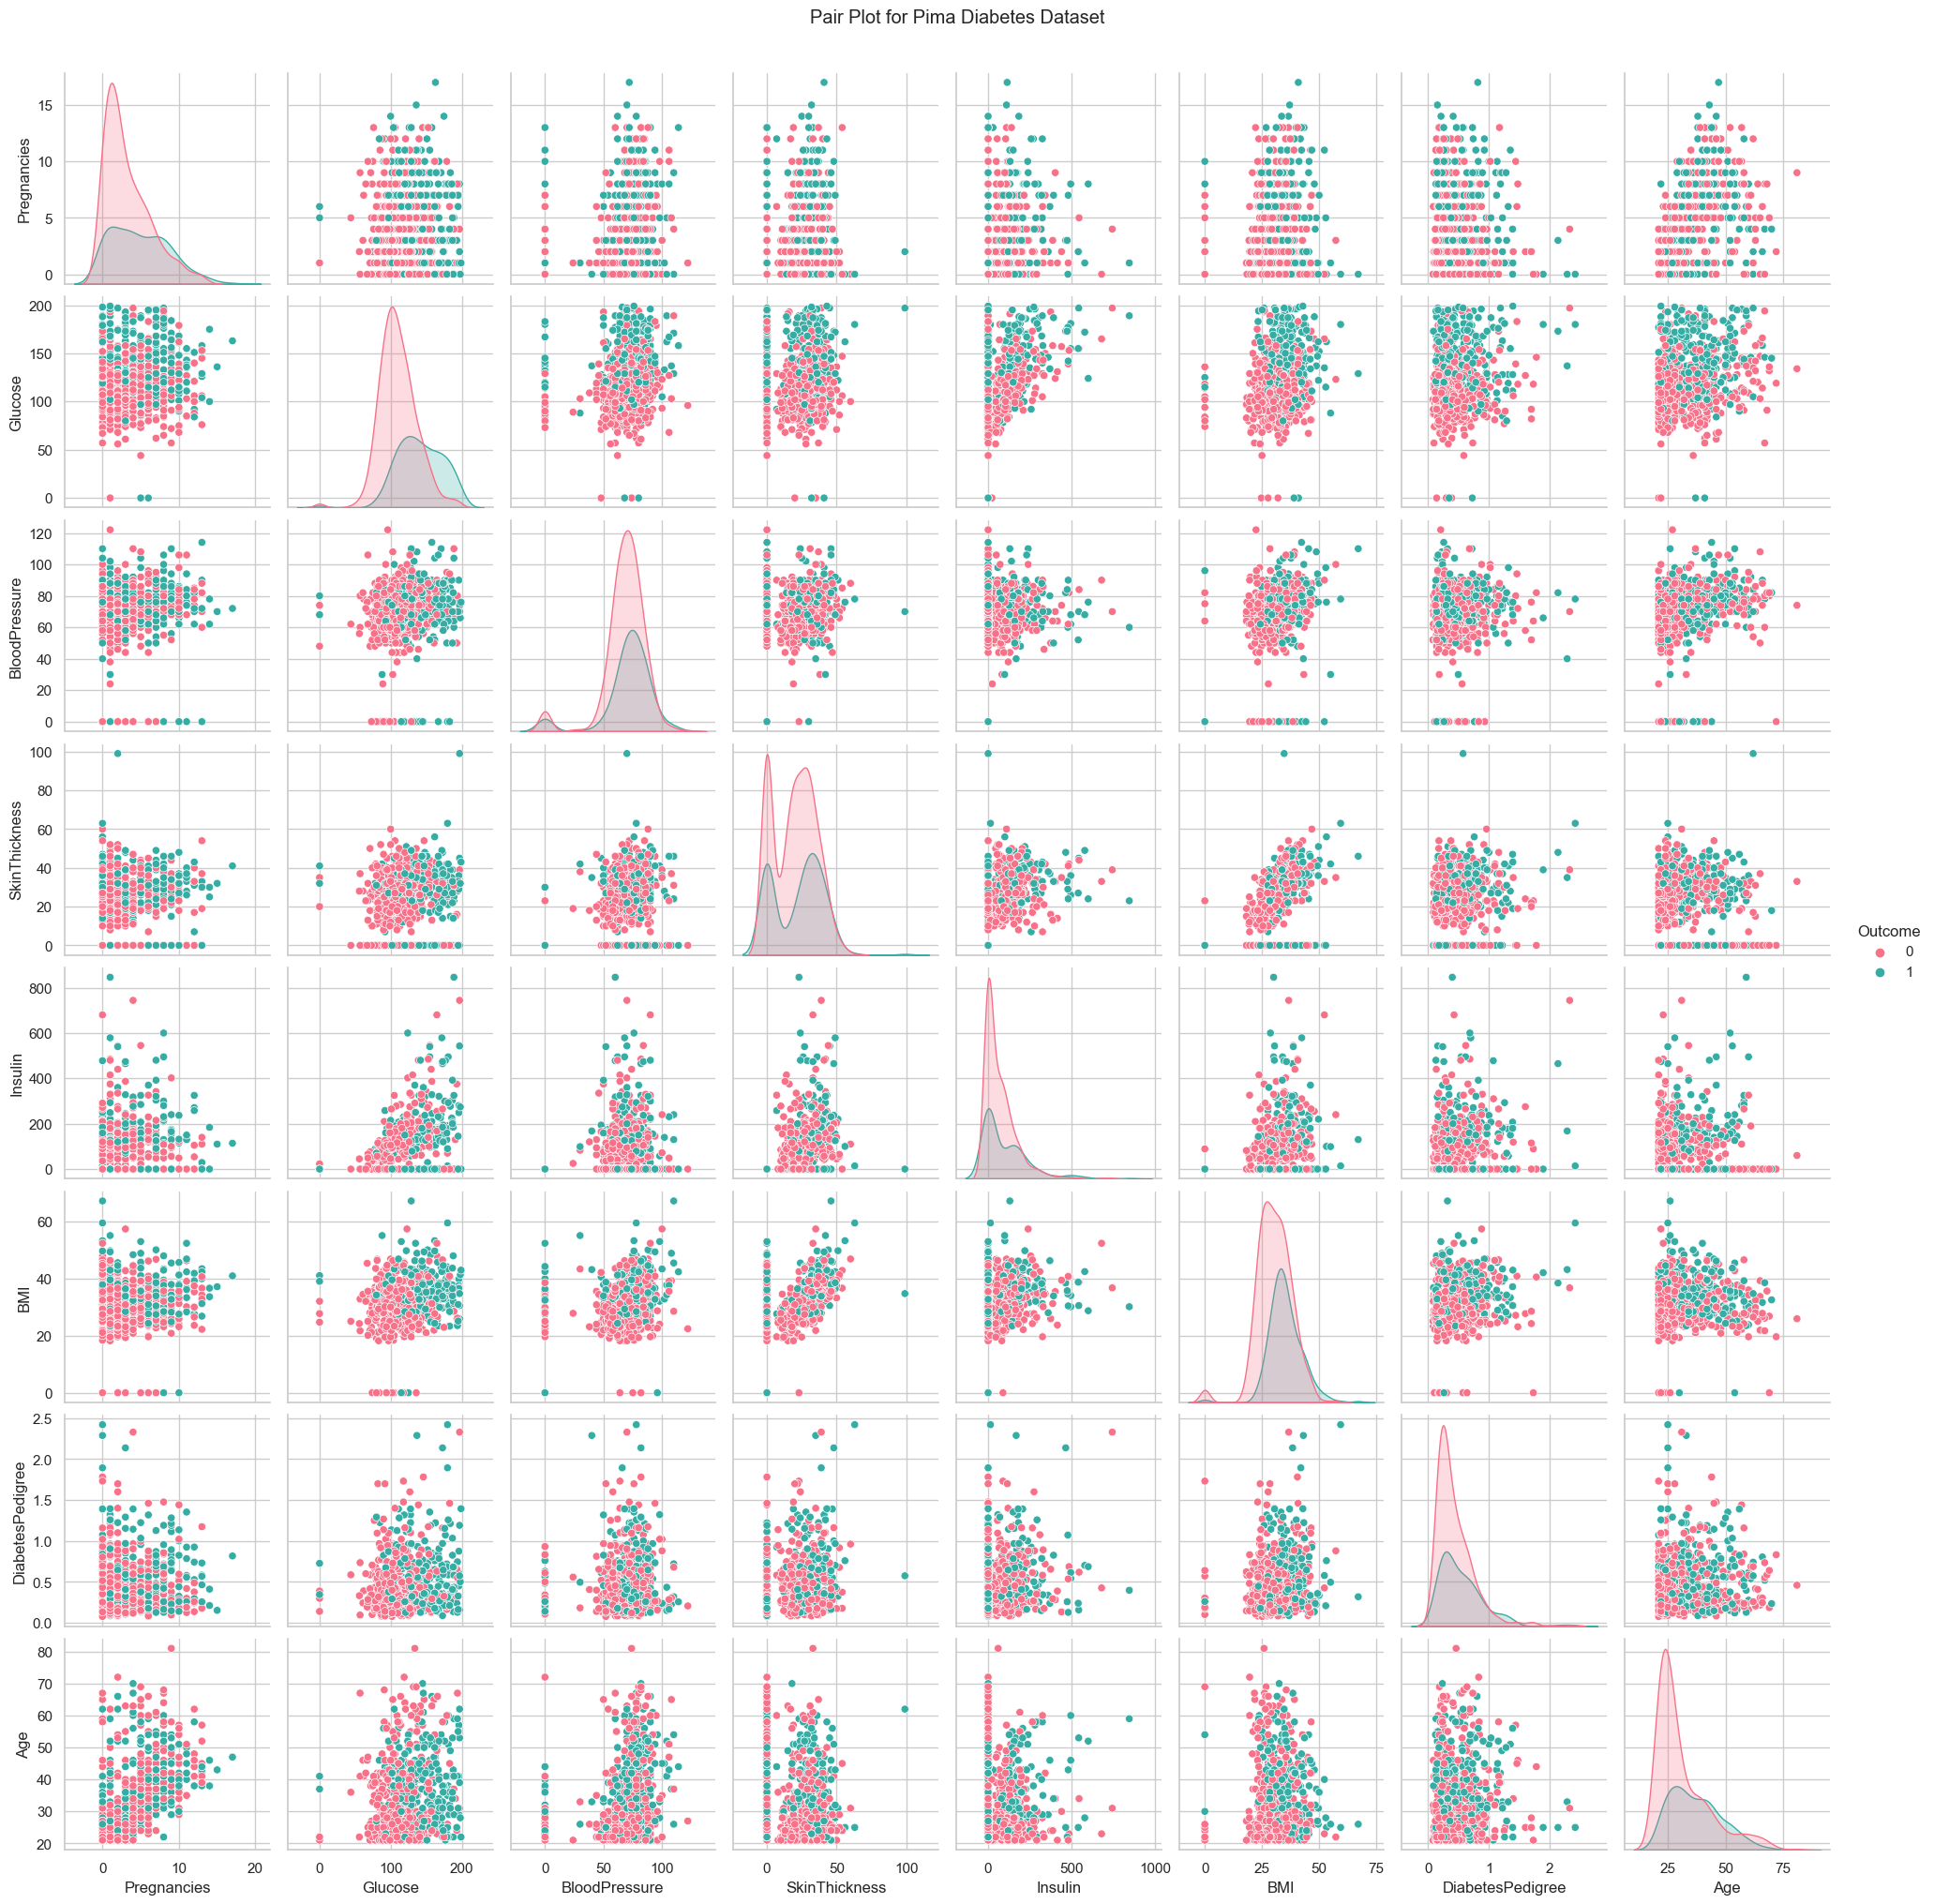

In [18]:
fig = plt.figure(figsize=(10,10))
#sns.countplot(data=df_diab, x='Pregnancies', hue='Outcome', palette='deep') #kind='reg', diag_kind= 'kde', corner=True


sns.pairplot(df_diab,hue='Outcome',diag_kind='kde',palette='husl')
plt.suptitle('Pair Plot for Pima Diabetes Dataset', y=1.02)
plt.show()

### Kurtosis and Skewness measure of each feature

In [19]:
# Setting the figure dimensions
#sns.set(style="whitegrid")
#fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot with specified bins on the x-axis
#sns.scatterplot(data=df_diab, y='Insulin', x='Glucose', hue='Outcome')

# Define bins on the x-axis
#bins = range(0, 18)

# Plot vertical lines to represent the bins
#for bin in bins:
 #   ax.axvline(bin, color='gray', linestyle='--', linewidth=0.8)

# Set x-axis ticks to match bin edges
#ax.set_xticks(bins)

# Show the plot
#plt.show()

In [20]:
# Setting the figure dimensions
#sns.set(style="whitegrid")
#fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot with specified bins on the x-axis
#sns.scatterplot(data=df_diab, x='Pregnancies', y='BMI', hue='Outcome')

# Define bins on the x-axis
#bins = range(0, 18)

# Plot vertical lines to represent the bins
#for bin in bins:
 #   ax.axvline(bin, color='gray', linestyle='--', linewidth=0.8)

# Set x-axis ticks to match bin edges
#ax.set_xticks(bins)

# Show the plot
#plt.show()


# Data Preprocessing

### Finding Missing values
logically the following features ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] cannot be 0, but since some values are 0 , we will treat them as missing values 


In [21]:
#Checking the data for glucose at 0
df_diab[df_diab.columns][df_diab['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [22]:
#df_diab[df_diab.columns][df_diab['Pregnancies']==1][df_diab['Age']<=23]
# Copy the diabetes dataframe and then we will apply preprocessing steps.
df_diab_copy = df_diab.copy()

In [23]:
#Converting 0 to NaN
df_diab_copy[['Glucose','BloodPressure','SkinThickness','BMI']] = df_diab_copy[[
    'Glucose','BloodPressure','SkinThickness','BMI']].replace(0, np.NaN)

#counting NaN values
df_diab_copy.isna().sum()

Pregnancies           0
Glucose               5
BloodPressure        35
SkinThickness       221
Insulin               0
BMI                  11
DiabetesPedigree      0
Age                   0
Outcome               0
dtype: int64

In [24]:
df_diab_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
745,12,100.0,84.0,33.0,105,30.0,0.488,46,0
746,1,147.0,94.0,41.0,0,49.3,0.358,27,1
747,1,81.0,74.0,41.0,57,46.3,1.096,32,0
748,3,187.0,70.0,22.0,200,36.4,0.408,36,1


Not imputing Insulin beacuse insulin can be 0

### Imputation
Based on the type of distribution of each variable Mean for normal distribution and Median imputation for skewed distribution


In [25]:
X = df_diab.drop(['Outcome'], axis =1)
for i, column in enumerate(X.columns) :
    print(column+"\nKurtosis :"+ str(kurtosis(X[column]))+"\nSkewness :"+str(skew(X[column])))
    print("\n")

Pregnancies
Kurtosis :0.18334697034089675
Skewness :0.9088167295788591


Glucose
Kurtosis :0.6389200613297836
Skewness :0.16684145457194843


BloodPressure
Kurtosis :5.0227860259333905
Skewness :-1.827487419154484


SkinThickness
Kurtosis :-0.49200852838534326
Skewness :0.11902092466028916


Insulin
Kurtosis :7.173751770703026
Skewness :2.2556138228073612


BMI
Kurtosis :3.2480503189239256
Skewness :-0.4258331470070181


DiabetesPedigree
Kurtosis :5.5884028699133825
Skewness :1.917792507562979


Age
Kurtosis :0.6576218884569602
Skewness :1.132309726022226




### Median Imputation

In [26]:
#Skewed Distributed - SkinThickness,Insulin,BMI
# Median Imputation
df_diab_copy['SkinThickness'].fillna(df_diab_copy['SkinThickness'].median(), inplace=True)
df_diab_copy['BMI'].fillna(df_diab_copy['BMI'].median(), inplace=True)

### Mean Imputations

In [27]:
#Normally Distributed - Glucsose, BloodPressure
# Blood Pressure
df_diab_copy['BloodPressure'].fillna(df_diab_copy['BloodPressure'].mean(), inplace=True)
temp = df_diab_copy[df_diab_copy['BloodPressure'].notnull()]
temp = temp[['BloodPressure', 'Outcome']].groupby(['Outcome'])[['BloodPressure']].median().reset_index()
print("Glucose Mean grouped by Outcome : \n",temp)
df_diab_copy.loc[(df_diab_copy['Outcome'] == 0 ) & (df_diab_copy['BloodPressure'].isna()), 'BloodPressure'] = 72
df_diab_copy.loc[(df_diab_copy['Outcome'] == 1 ) & (df_diab_copy['BloodPressure'].isna()), 'BloodPressure'] = 74

## Glucose -  Grouped by Outcome and then mean value for glucose is calculated based on the 0 and 1 outcomes.
temp = df_diab_copy[df_diab_copy['Glucose'].notnull()]
temp = temp[['Glucose', 'Outcome']].groupby(['Outcome'])[['Glucose']].median().reset_index()
print("Glucose Mean grouped by Outcome : \n",temp)
df_diab_copy.loc[(df_diab_copy['Outcome'] == 0 ) & (df_diab_copy['Glucose'].isna()), 'Glucose'] = 107
df_diab_copy.loc[(df_diab_copy['Outcome'] == 1 ) & (df_diab_copy['Glucose'].isna()), 'Glucose'] = 140



Glucose Mean grouped by Outcome : 
    Outcome  BloodPressure
0        0           72.0
1        1           74.0
Glucose Mean grouped by Outcome : 
    Outcome  Glucose
0        0    107.0
1        1    140.0


In [28]:
df_diab_copy.isna().sum()

Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

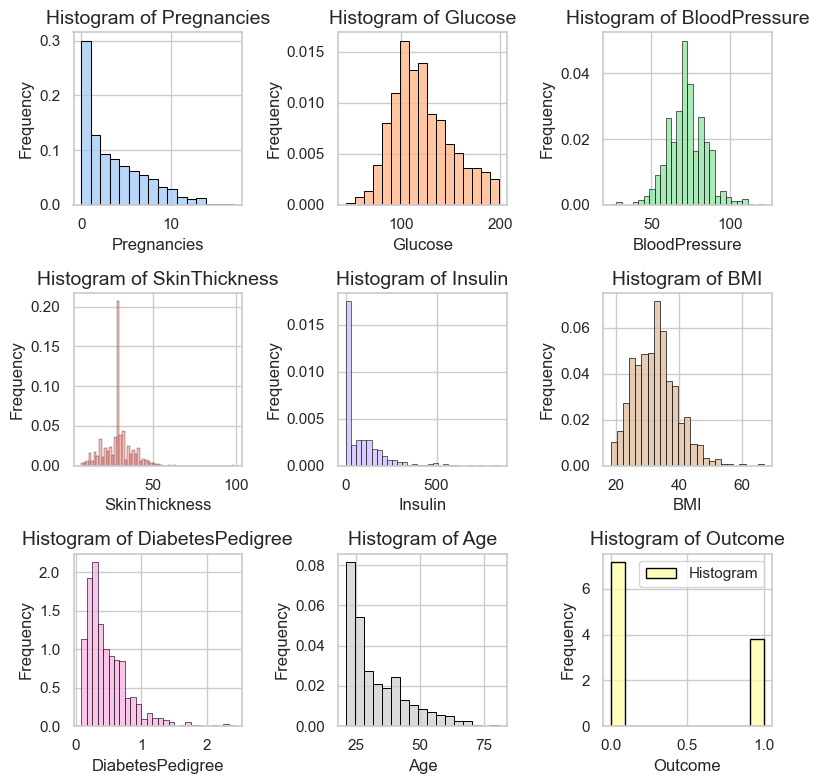

In [29]:
#Setting the figure dimensions
sns.set(style="whitegrid")
plt.figure(figsize=(8,8))

#Drawing histogram subplots for each feature
for i, column in enumerate(df_diab_copy.columns):
    plt.subplot(3,3,i+1)
    #sns.kdeplot(df_diab_copy[column], color="black", label="Kernel Density")
    sns.histplot(df_diab_copy[column], stat="density", color=color_palette[i], edgecolor="black",label="Histogram") # bins=20
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
plt.legend()
plt.tight_layout()
plt.show()
    

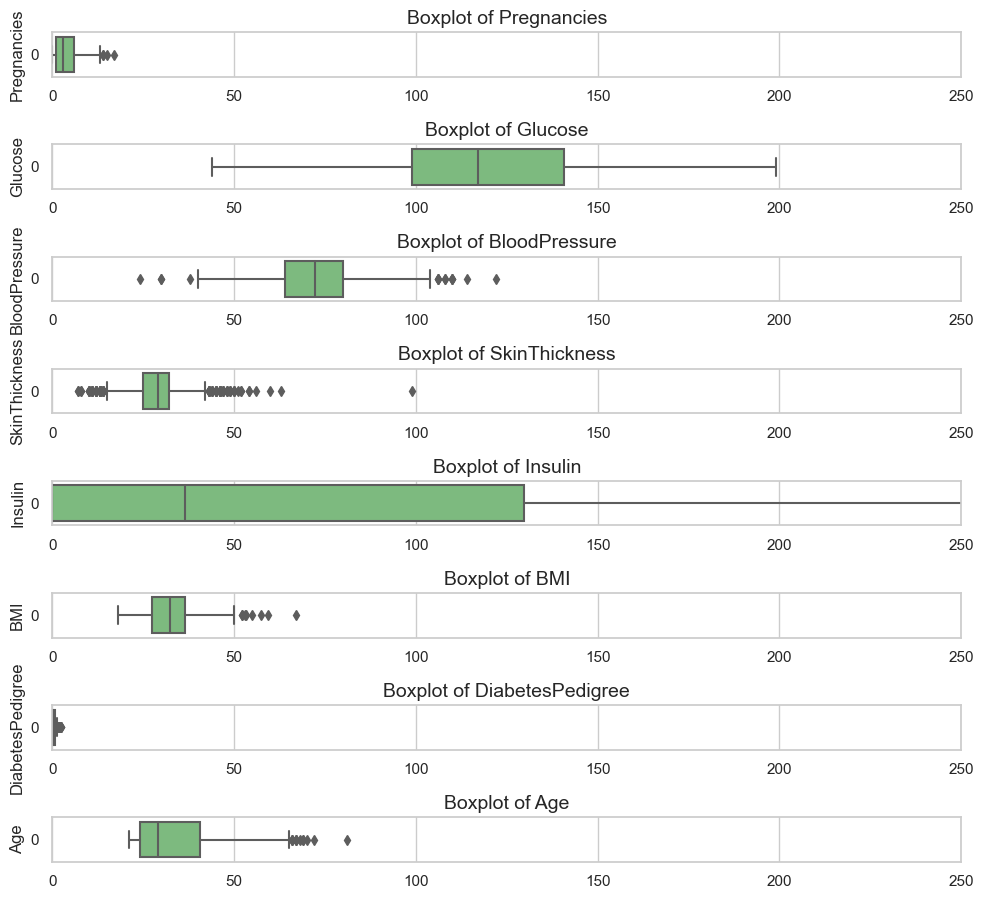

In [30]:
#Setting the figure dimensions
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))

for i, column in enumerate(df_diab_copy.columns[:-1]): #Exclude target column - Outcome
    plt.subplot(9,1,i+1)
    sns.boxplot(df_diab_copy[column], orient='h', palette='Greens')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel(f'{column}', fontsize=12)
    plt.xlim(0,250)
    
plt.tight_layout()
plt.show()

## Feature Addition

In [31]:
# Adding a new column SevenOrMorePregnancies
df_diab_copy['SevenOrMorePregnancies'] = (df_diab_copy['Pregnancies'] >= 7).astype('int64')

In [32]:
df_diab_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,SevenOrMorePregnancies
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1,0
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0,0
2,8,183.0,64.0,29.0,0,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
745,12,100.0,84.0,33.0,105,30.0,0.488,46,0,1
746,1,147.0,94.0,41.0,0,49.3,0.358,27,1,0
747,1,81.0,74.0,41.0,57,46.3,1.096,32,0,0
748,3,187.0,70.0,22.0,200,36.4,0.408,36,1,0


## Feature Scaling

### Standardization

standard scalong
minmax
log

In [33]:
df_diab_copy_scaled1 = df_diab_copy.copy()
#Input variables (exclude target var)
X_train = df_diab_copy.drop('Outcome', axis=1)

#Output Variable - 'Outcome'
y_train = df_diab_copy['Outcome']

#Splitting the variables into continous and categorical
target= df_diab_copy['Outcome']
categorical_features = df_diab_copy.iloc[:,-1:]
continous_vars= df_diab_copy.drop(['Outcome','SevenOrMorePregnancies'], axis=1)

#Applying Standard Scaling
scaler1 = StandardScaler()
features_transformed = pd.DataFrame(scaler1.fit_transform(continous_vars), columns=continous_vars.columns)

features_transformed = pd.concat([features_transformed, categorical_features, target], axis=1)
features_transformed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,SevenOrMorePregnancies,Outcome
0,0.640173,0.868724,-0.029631,0.676801,-0.699295,0.169254,0.462359,1.438616,0,1
1,-0.844459,-1.199563,-0.524255,-0.003933,-0.699295,-0.845805,-0.369222,-0.185168,0,0
2,1.234026,2.017772,-0.689129,-0.003933,-0.699295,-1.324333,0.597943,-0.099706,1,1
3,-0.844459,-1.068243,-0.524255,-0.684667,0.118506,-0.628293,-0.923609,-1.039792,0,0
4,-1.141385,0.507595,-2.667624,0.676801,0.762306,1.546834,5.466909,-0.014244,0,1
...,...,...,...,...,...,...,...,...,...,...
745,2.421732,-0.707113,0.959616,0.449890,0.214206,-0.352777,0.043556,1.096766,1,0
746,-0.844459,0.835894,1.783988,1.357535,-0.699295,2.445887,-0.348131,-0.527018,0,1
747,-0.844459,-1.330882,0.135243,1.357535,-0.203394,2.010861,1.875444,-0.099706,0,0
748,-0.250606,2.149092,-0.194506,-0.798123,1.040706,0.575278,-0.197482,0.242143,0,1


### Quantile Transformer

Recognizing the presence of a one-sided shape in certain features, we have opted for a more nuanced approach through nonlinear scaling. Our choice in this regard is the QuantileTransformer, a method known for reshaping distributions to closely resemble either a uniform or normal distribution. This decision was informed by insights derived from a referenced notebook, which highlighted the efficacy of the QuantileTransformer in addressing skewed or one-sided data distributions.

The aim of this nonlinear scaling strategy is to foster a more balanced and normalized representation of feature distributions

df_diab_copy_scaled = df_diab_copy.copy()

target= df_diab_copy_scaled['Outcome']
categorical_features = df_diab_copy_scaled.iloc[:,-1:]
continous_features = df_diab_copy_scaled.drop(['Outcome','SevenOrMorePregnancies'], axis=1)

scaler = QuantileTransformer(output_distribution='normal', n_quantiles=100, random_state=0)
features_transformed = pd.DataFrame(scaler.fit_transform(continous_features), columns=continous_features.columns)
features_transformed = pd.concat([features_transformed, categorical_features, target], axis=1)
features_transformed

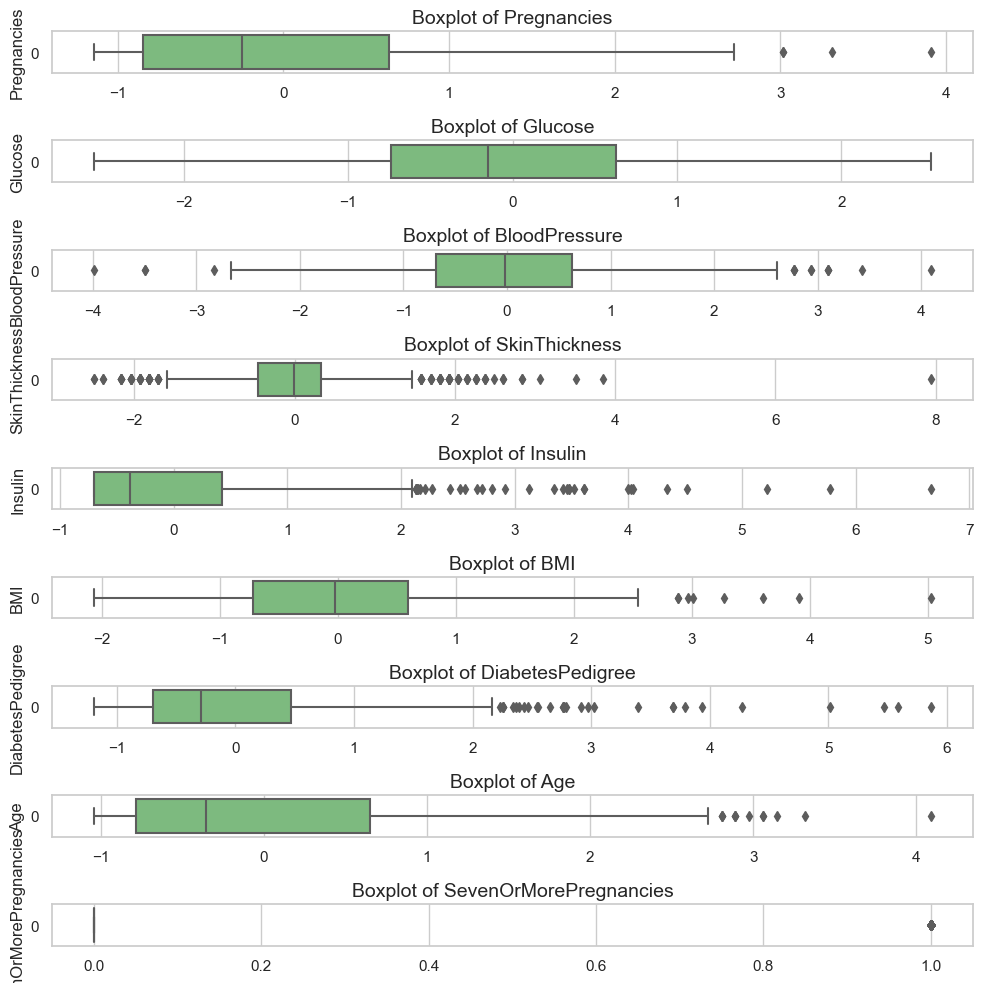

In [ ]:
#Setting the figure dimensions
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))

for i, column in enumerate(features_transformed.columns[:-1]): #Exclude target column - Outcome
    plt.subplot(9,1,i+1)
    sns.boxplot(features_transformed[column], orient='h', palette='Greens')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel(f'{column}', fontsize=12)
    
plt.tight_layout()
plt.show()

# PERFORMANCE METRICS - Model Evaluation

In [ ]:
#Metrics Calculations for Classification problem:
def calculate_metrics(y_test, y_pred):
    metrics_dict = {}
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)*100
    metrics_dict['Accuracy Score'] = accuracy

    # Classification Report
    classification_rep = classification_report(y_test, y_pred)
    metrics_dict['Classification Report'] = classification_rep

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    metrics_dict['Confusion Matrix'] = conf_matrix
    
     #ROC,AUC
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    metrics_dict['ROC Curve'] = {'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds, 'AUC Score': auc_score}

    return metrics_dict

## Logistic Regression Model for SevenOrMorePregnancies

In [ ]:
#Splitting the data into input features and outcome 
X = features_transformed[['SevenOrMorePregnancies']]
y= features_transformed['Outcome']

#Splitting the data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)#, stratify=y

# Initializing and fitting the Logistic regression model 
model = LogisticRegression()
model.fit(X_train,y_train)

# Calculate and print the coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]
print("Coefficients:", coefficients)
print("Intercept:", intercept)

#Predicting the test data based on the trained model
y_pred = model.predict(X_test)

Coefficients: [1.19035107]
Intercept: -0.8729105922758645


### Performance analysis `

Accuracy Score:
68.66666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       104
           1       0.48      0.35      0.41        46

    accuracy                           0.69       150
   macro avg       0.61      0.59      0.60       150
weighted avg       0.66      0.69      0.67       150


Confusion Matrix:
[[87 17]
 [30 16]]

ROC Curve:
{'fpr': array([0.        , 0.16346154, 1.        ]), 'tpr': array([0.        , 0.34782609, 1.        ]), 'thresholds': array([2, 1, 0], dtype=int64), 'AUC Score': 0.5921822742474916}



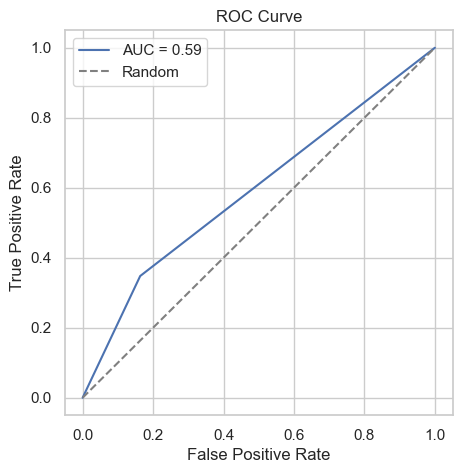

In [ ]:
#compare the actual y_test and predicted y_pred
all_metrics = calculate_metrics(y_test, y_pred)

for metric_name, metric_value in all_metrics.items():
    print(f"{metric_name}:\n{metric_value}\n")
    
# Display the ROC Curve
plt.figure(figsize=(5, 5))
plt.plot(all_metrics['ROC Curve']['fpr'], all_metrics['ROC Curve']['tpr'], label=f'AUC = {all_metrics["ROC Curve"]["AUC Score"]:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Predicting Probability of getting diabetes based on feature: SevenOrMorePregnancies

In [ ]:
#Predicting probability based on testing data
y_probs = model.predict_proba(X_test)[:,-1]

#Probability for diabetes based on no. of pregnancies
prob_six_or_lesser = model.predict_proba([[0]])[0,1]
prob_seven_or_more = model.predict_proba([[1]])[0,1]

# Print the results
print(f"Probability of diabetes with six or fewer pregnancies: {prob_six_or_lesser:.4f}")
print(f"Probability of diabetes with seven or more pregnancies: {prob_seven_or_more:.4f}")


Probability of diabetes with six or fewer pregnancies: 0.2946
Probability of diabetes with seven or more pregnancies: 0.5787


C:\Users\Kashish\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Kashish\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Regression Models 

In [ ]:
features_transformed.drop("SevenOrMorePregnancies", inplace=True, axis=1)

### Train-test-split

In [ ]:
#Splitting the data into input features and outcome 
#X = features_transformed.drop('Outcome',axis=1)

X = features_transformed[['Glucose','BMI','Age',]]
y= features_transformed['Outcome']

#Splitting the data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=10, stratify=y)

### 1. Logistic Regession Model and Performance Analysis

Coefficients: [1.02328786 0.60380189 0.36857145]
Intercept: -0.8180815709553655
Training Score:
 75.5
Testing Score
Accuracy Score:
82.0

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        98
           1       0.75      0.73      0.74        52

    accuracy                           0.82       150
   macro avg       0.80      0.80      0.80       150
weighted avg       0.82      0.82      0.82       150


Confusion Matrix:
[[85 13]
 [14 38]]

ROC Curve:
{'fpr': array([0.        , 0.13265306, 1.        ]), 'tpr': array([0.        , 0.73076923, 1.        ]), 'thresholds': array([2, 1, 0], dtype=int64), 'AUC Score': 0.7990580847723705}



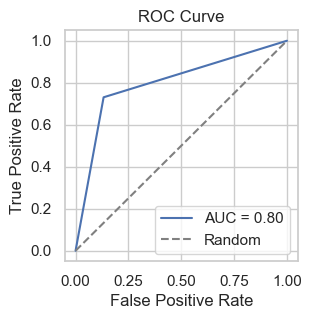

In [ ]:
# Initializing and fitting the Logistic regression model 
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

# Calculate and print the coefficients
coefficients = model_lr.coef_[0]
intercept = model_lr.intercept_[0]
print("Coefficients:", coefficients)
print("Intercept:", intercept)

#Predicting the test data based on the trained model
y_pred_lr = model_lr.predict(X_test)


#Training Score
lr_score=model_lr.score(X_train,y_train)*100
print("Training Score:\n",lr_score)
lr_prec = precision_score(y_test,y_pred_lr)*100
lr_accu = accuracy_score(y_test,y_pred_lr)*100


#compare the actual y_test and predicted y_pred
print("Testing Score")
all_metrics = calculate_metrics(y_test, y_pred_lr)

for metric_name, metric_value in all_metrics.items():
    print(f"{metric_name}:\n{metric_value}\n")
    
    
# Display the ROC Curve
plt.figure(figsize=(3, 3))
plt.plot(all_metrics['ROC Curve']['fpr'], all_metrics['ROC Curve']['tpr'], label=f'AUC = {all_metrics["ROC Curve"]["AUC Score"]:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



### 2. Decision Tree and Performance analysis


Training Score:
 100.0
Accuracy Score:
66.66666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        98
           1       0.52      0.54      0.53        52

    accuracy                           0.67       150
   macro avg       0.63      0.64      0.64       150
weighted avg       0.67      0.67      0.67       150


Confusion Matrix:
[[72 26]
 [24 28]]

ROC Curve:
{'fpr': array([0.        , 0.26530612, 1.        ]), 'tpr': array([0.        , 0.53846154, 1.        ]), 'thresholds': array([2, 1, 0], dtype=int64), 'AUC Score': 0.6365777080062793}



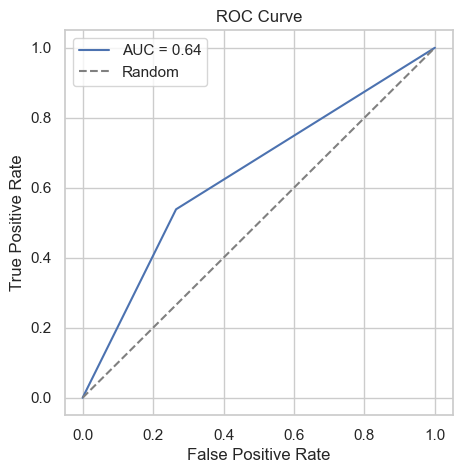

In [ ]:
# Train the Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test)


#Training Score
dt_score=model_dt.score(X_train,y_train)*100
print("Training Score:\n",dt_score)

dt_prec = precision_score(y_test,y_pred_dt)*100

dt_accu = accuracy_score(y_test,y_pred_dt)*100


#compare the actual y_test and predicted y_pred
all_metrics = calculate_metrics(y_test, y_pred_dt)

for metric_name, metric_value in all_metrics.items():
    print(f"{metric_name}:\n{metric_value}\n")
    
# Display the ROC Curve
plt.figure(figsize=(5, 5))
plt.plot(all_metrics['ROC Curve']['fpr'], all_metrics['ROC Curve']['tpr'], label=f'AUC = {all_metrics["ROC Curve"]["AUC Score"]:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 3. KNN and Performance analysis

Training Score:
 81.83333333333334
Accuracy Score:
70.66666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.77        98
           1       0.57      0.65      0.61        52

    accuracy                           0.71       150
   macro avg       0.68      0.69      0.69       150
weighted avg       0.72      0.71      0.71       150


Confusion Matrix:
[[72 26]
 [18 34]]

ROC Curve:
{'fpr': array([0.        , 0.26530612, 1.        ]), 'tpr': array([0.        , 0.65384615, 1.        ]), 'thresholds': array([2, 1, 0], dtype=int64), 'AUC Score': 0.694270015698587}



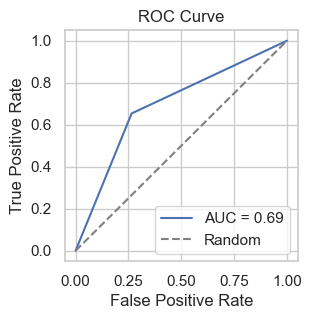

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)


#Training Score
knn_score=model_knn.score(X_train,y_train)*100
print("Training Score:\n",knn_score)

knn_prec = precision_score(y_test,y_pred_knn)*100

knn_accu = accuracy_score(y_test,y_pred_knn)*100


#compare the actual y_test and predicted y_pred
all_metrics = calculate_metrics(y_test, y_pred_knn)
for metric_name, metric_value in all_metrics.items():
    print(f"{metric_name}:\n{metric_value}\n")
    
# Display the ROC Curve
plt.figure(figsize=(3, 3))
plt.plot(all_metrics['ROC Curve']['fpr'], all_metrics['ROC Curve']['tpr'], label=f'AUC = {all_metrics["ROC Curve"]["AUC Score"]:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 4. Random Forest and Performance analysis

Training Score:
 100.0
Accuracy Score:
73.33333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        98
           1       0.60      0.69      0.64        52

    accuracy                           0.73       150
   macro avg       0.71      0.72      0.72       150
weighted avg       0.75      0.73      0.74       150


Confusion Matrix:
[[74 24]
 [16 36]]

ROC Curve:
{'fpr': array([0.        , 0.24489796, 1.        ]), 'tpr': array([0.        , 0.69230769, 1.        ]), 'thresholds': array([2, 1, 0], dtype=int64), 'AUC Score': 0.7237048665620094}



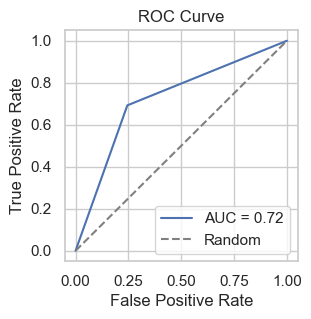

In [44]:
model_rf = RandomForestClassifier(n_estimators=300, random_state=0)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

#Training Score
rf_score=model_rf.score(X_train,y_train)*100
print("Training Score:\n",rf_score)

rf_prec = precision_score(y_test,y_pred_rf)*100
rf_accu = accuracy_score(y_test,y_pred_rf)*100

#compare the actual y_test and predicted y_pred
all_metrics = calculate_metrics(y_test, y_pred_rf)
for metric_name, metric_value in all_metrics.items():
    print(f"{metric_name}:\n{metric_value}\n")
    
# Display the ROC Curve
plt.figure(figsize=(3, 3))
plt.plot(all_metrics['ROC Curve']['fpr'], all_metrics['ROC Curve']['tpr'], label=f'AUC = {all_metrics["ROC Curve"]["AUC Score"]:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Comparitive Models Analysis :

In [45]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','KNN ','Random Forest Classifier'],
    'Training Score':[lr_score, dt_score, knn_score, rf_score],
    'Accuracy': [ lr_accu,dt_accu, knn_accu, rf_accu],
    'Precision':[lr_prec,dt_prec,knn_prec,rf_prec]
})
models

,Model,Training Score,Accuracy,Precision
0,Logistic Regression,75.500000,82.000000,74.509804
1,Decision Tree,100.000000,66.666667,51.851852
2,KNN,81.833333,70.666667,56.666667
3,Random Forest Classifier,100.000000,73.333333,60.000000


## Predicting the probability of having diabetes - Final model : LOGISTIC REGRESSION

In [46]:
cols = ['Glucose','BMI','Age']
df_to_predict = pd.read_csv("ToPredict.csv")

df_to_predict2 = pd.DataFrame(scaler1.fit_transform(df_to_predict[cols]),columns=cols)

predictions = model_lr.predict(df_to_predict2)
df_to_predict['predicted_outcome'] = predictions
probabilities = model_lr.predict_proba(df_to_predict2)[:,1]
df_to_predict['probability']= probabilities

df_to_predict

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,predicted_outcome,probability
0,4,136,70,0,0,31.2,1.182,22,0,0.165244
1,1,121,78,39,74,39.0,0.261,28,0,0.236242
2,3,108,62,24,0,26.0,0.223,25,0,0.042341
3,0,181,88,44,510,43.3,0.222,26,1,0.826427
4,8,154,78,32,0,32.4,0.443,45,1,0.564862
